# COGS 108 - Data Checkpoint

## Authors

- Jared Wang: Data Cleaning and Summary Statistics
- Dylan Dsouza: Data Overview/Loading and Data Cleaning
- Christian Kumagai: Proposal Feedback and Data Description
- Kyle Zhao: Data Description and Concerns

## Research Question

Do dessert recipes that use honey as the primary sweetener differ in caloric content, sugar content, and total fat (normalized to FDA daily values) compared to desserts that use sugar as the primary sweetener?

As a control, we will filter recipes using the “desserts” tag and classified as honey-based or sugar-based using ingredient lists, restricting to recipes that contain only one primary sweetener. Then, we will define nutritional outcomes, specifically by total calories, sugar (% daily value), and total fat (% daily value) extracted from the nutrition column. As a method of comparison, we intend to use independent samples t-tests to compare mean nutritional values between honey and sugar desserts. We also intend to conduct downstream secondary analyses using ANOVAs, although we are yet to concretize the details for this, which we will likely do once our EDA is complete.Instructions: REPLACE the contents of this cell with your work, including any updates to recover points lost in your proposal feedback

## Background and Prior Work

*Based on project proposal feedback, we have refined this section to include a robust discussion of the results of previous analyses, specifically the gap which we intend to address with our project.*

Desserts are often viewed as indulgent foods, yet many consumers attempt to make them "healthier" by replacing refined sugar with alternative sweeteners such as honey. Honey is frequently marketed and perceived as more natural or wholesome, and this perception commonly appears in online dessert recipes and food blogs. However, research on the health halo effect suggests that when foods are framed as natural or organic, consumers tend to perceive them as healthier and sometimes even lower in calories despite having similar objective nutritional content. This indicates that perceived healthfulness does not necessarily correspond to measurable nutritional differences, motivating an empirical evaluation of whether honey based desserts are actually nutritionally distinct from sugar based desserts.

From a nutritional science perspective, controlled studies comparing caloric sweeteners have often found that honey and refined sugars produce similar short term metabolic responses when consumed at equivalent carbohydrate levels. These findings suggest that simply substituting one caloric sweetener for another does not inherently improve nutritional outcomes unless total quantities or accompanying ingredients change. Although honey differs in composition from granulated sugar, both function primarily as carbohydrate sources, and ingredient level differences do not automatically translate into meaningful differences in full recipes.

Large scale computational research has demonstrated that online recipe datasets can be systematically analyzed to investigate ingredient and nutrition patterns. In particular, Majumder et al. (2019) introduced and analyzed a processed Food.com dataset containing approximately 180,000 recipes and 700,000 user interactions, showing that the dataset supports reproducible computational modeling and structured filtering.<a name="cite_ref-1"></a>[<sup>1</sup>](#cite_note-1) Although their work focused on personalized recipe generation rather than nutritional comparison, it validated Food.com as a robust and well structured resource suitable for large scale quantitative analysis.

To compare nutritional outcomes in a standardized and interpretable way, we rely on federal nutrition labeling guidelines. The U.S. Food and Drug Administration defines Daily Values and Percent Daily Value as reference standards indicating how much a nutrient in one serving contributes to recommended daily intake.<a name="cite_ref-2"></a>[<sup>2</sup>](#cite_note-2) Using normalized measures such as sugar percent Daily Value and total fat percent Daily Value allows comparisons across recipes that may differ in serving size or formulation. Additionally, USDA FoodData Central provides authoritative nutrient composition data for foods such as honey and granulated sugar, supporting ingredient level comparisons of energy and sugar content.<a name="cite_ref-3"></a>[<sup>3</sup>](#cite_note-3)

Despite this body of work, an important gap remains. Prior nutrition research examines sweeteners under controlled experimental conditions, and computational recipe research validates large scale datasets, but there has been limited empirical analysis comparing honey based and sugar based desserts under strict filtering conditions within real world recipe data. Furthermore, research on health perception demonstrates that natural labeling can bias consumer judgments, yet it does not directly test whether such perceptions align with actual nutritional differences in complete recipes. Our project addresses this gap by applying explicit inclusion criteria, restricting to dessert tagged recipes containing a single primary sweetener, and conducting statistical comparisons of caloric content, sugar percent Daily Value, and total fat percent Daily Value between honey and sugar based desserts.

We also acknowledge that honey based desserts may systematically differ in other ingredients such as inclusion of nuts, oils, or butter, meaning any observed differences may reflect broader recipe style patterns rather than the sweetener alone. Accordingly, we will clearly document our filtering decisions and interpret results with this potential confounding in mind.

1. <a name="cite_note-1"></a> [^](#cite_ref-1) Majumder, B. P., Li, S., Ni, J., & McAuley, J. (2019). *Generating Personalized Recipes from Historical User Preferences*. University of California, San Diego.
2. <a name="cite_note-2"></a> [^](#cite_ref-3) U.S. Food and Drug Administration (FDA). Daily Value and nutrition labeling reference. https://www.fda.gov
3. <a name="cite_note-3"></a> [^](#cite_ref-2) USDA FoodData Central. Nutrition entries for honey and granulated sugar. https://fdc.nal.usda.gov

## Hypothesis


We hypothesize that desserts using honey as the primary sweetener will have higher overall caloric content and slightly higher total fat compared to sugar-sweetened desserts when normalized to FDA daily values, while sugar (% daily value) may be comparable. Although honey is often perceived as a healthier alternative, it is more calorically dense than sugar (64 cal/g for 1 tablespoon of honey, as compared to 48 cal/g for 1 tablespoon of sugar), and recipes claiming to be 'healthy' may not reduce quantities enough to offset this difference. Additionally, honey-based desserts often include complementary fat sources (e.g., butter, oils, nuts), which may contribute to comparable or higher fat content.

**Calories**

* Null Hypothesis (H₀): μ_honey ≤ μ_sugar

* Alternate Hypothesis (H₁): μ_honey > μ_sugar

**Total fat (% DV)**

* Null Hypothesis (H₀): μ_honey ≤ μ_sugar

* Alternate Hypothesis (H₁): μ_honey > μ_sugar

**Sugar (% DV)**

* Null Hypothesis (H₀): μ_honey = μ_sugar

* Alternate Hypothesis (H₁): μ_honey ≠ μ_sugar

## Data

### Data overview

**Dataset Name:** Food.com Recipes

**Link to the dataset:** https://www.kaggle.com/datasets/shuyangli94/food-com-recipes-and-user-interactions/data?select=RAW_recipes.csv

**Number of observations:** 231,637 recipes

**Number of variables:** 12

**Relevant variables:**

`tags`: Tags are the user designated, short descriptions which denote key qualities, such as cook time, ingredients used, health-related descriptions, place of origin, and more. To note, these descriptions are self proclaimed and fully up to the discretion of the inputter, and are not fact checked. In our project, we aim to use tags to filter for specifically items labeled to be "deserts", helping sort out relevant rows when discerning between sugar and honey. 

`nutrition`: Nutrition is the health related metrics which we are analyzing. Specifically, each list gives the following information, in its respective order: Calories (#), total fat (Percent Daily Value), sugar (%VD), sodium (%DV), protein (%DV), saturated fat (%DV), carbohydrates (%DV). In our project, we ain to use nutrition as our basis for determinig the "healthiness" of a specific food, specifically analyzing the calories, total fat, and sugar content. 

`ingredients`: Ingredients is a list, with all ingredients used in the recipe. 

**Shortcomings:**

One shortcoming that we found with this dataset is the lack of serving size descriptions. This is relevant as we are comparing calories, sugar, and fat content, where larger portion sizes would skew these proportions. Additionally, as mentioned above, the tags used for classification are entirely user generated, therefore, we may not know exactly what one person considers to be a desert or not. 

### Food.com Recipes Dataset

#### Description

The dataset we are using contains information on recipes from Food.com. There are many important metrics contained in this dataset, but for our specific research question, the nutrition column is especially relevant. This column is formatted as a list of floats as (calories (#), total fat (PDV), sugar (PDV), sodium (PDV), protein (PDV), saturated fat (PDV), and carbohydrates (PDV)).

Here are some of the most important metrics from this nutrition column: calories which is measured in kilocalories per serving and represents total energy content. Very high values (>800 kcal) indicate high energy density desserts. Total fat which is measured in percent daily value. 100% DV means one serving meets the entire recommended daily intake for fat. Sugar, which is measured in percent daily value, indicates how much of the recommended daily sugar intake one serving provides. Values near or above 100% suggest extremely high sugar content.

Some additional columns are also necessary like the Tags column which has a list of strings which help us filter out desserts. Another column that is important is the Ingredients column which is a list of strings which help us determine the recipes that have the primary sweetener as either honey or sugar.

#### Concerns

One concern is that determining the primary sweetener requires inferring from the ingredients list. The dataset does not explicitly label honey or sugar as primary ingredients. Some recipes may include both honey and sugar, or use alternative sweeteners alongside them. Misclassification could blur differences between groups.

Another concern is serving size variability. Nutritional values are reported per serving, but serving sizes are defined by the individual authors and are not standardized across all recipes. As a result, differences in calories or % Daily Value may partly reflect differences in portion definitions rather than true differences driven by the type of sweetener.

Similarly, the nutrition values may be estimated by the authors instead of being strictly tested and measured, which could also introduce potential measurement errors/variability.

#### Imports

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#### Data Loading

First, we load the raw data (uploaded as a CSV via Git LFS) using pandas:

In [2]:
raw_df = pd.read_csv("data/00-raw/RAW_recipes.csv")
raw_df.head()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8


Then, we understand the number of observations and variables within this raw data:

In [3]:
raw_df.shape

(231637, 12)

We list the variables within this raw data, understanding their data types:

In [4]:
raw_df.dtypes

name              object
id                 int64
minutes            int64
contributor_id     int64
submitted         object
tags              object
nutrition         object
n_steps            int64
steps             object
description       object
ingredients       object
n_ingredients      int64
dtype: object

#### Data Preprocessing

First, we filter the raw data by our variables of interest:

In [5]:
processed_df = raw_df[['tags', 'nutrition', 'ingredients']]
processed_df.head()

,tags,nutrition,ingredients
0,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]","['winter squash', 'mexican seasoning', 'mixed ..."
1,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]","['prepared pizza crust', 'sausage patty', 'egg..."
2,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]","['ground beef', 'yellow onions', 'diced tomato..."
3,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]","['spreadable cheese with garlic and herbs', 'n..."
4,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]","['tomato juice', 'apple cider vinegar', 'sugar..."


Although our dataset looks consistent and tidy, we run a quick check for null values to flag any missing entries:

In [6]:
processed_df.isnull().sum()

tags           0
nutrition      0
ingredients    0
dtype: int64

Next, given that all data entries in the dataset are stored as strings, we convert them into lists:

In [7]:
def to_list(str):
    as_list = str.strip("[]").replace("'", "").replace('"', "").strip().split(",")
    cleaned = []
    for elem in as_list:
        cleaned.append(elem.strip())
    return cleaned

processed_df["tags"] = processed_df["tags"].apply(to_list)
processed_df["nutrition"] = processed_df["nutrition"].apply(to_list)
processed_df

,tags,nutrition,ingredients
0,"[60-minutes-or-less, time-to-make, course, mai...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]","['winter squash', 'mexican seasoning', 'mixed ..."
1,"[30-minutes-or-less, time-to-make, course, mai...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]","['prepared pizza crust', 'sausage patty', 'egg..."
2,"[time-to-make, course, preparation, main-dish,...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]","['ground beef', 'yellow onions', 'diced tomato..."
3,"[60-minutes-or-less, time-to-make, course, mai...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]","['spreadable cheese with garlic and herbs', 'n..."
4,"[weeknight, time-to-make, course, main-ingredi...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]","['tomato juice', 'apple cider vinegar', 'sugar..."
...,...,...,...
231632,"[ham, 60-minutes-or-less, time-to-make, course...","[415.2, 26.0, 34.0, 26.0, 44.0, 21.0, 15.0]","['celery', 'onion', 'green sweet pepper', 'gar..."
231633,"[15-minutes-or-less, time-to-make, course, pre...","[14.8, 0.0, 2.0, 58.0, 1.0, 0.0, 1.0]","['paprika', 'salt', 'garlic powder', 'onion po..."
231634,"[60-minutes-or-less, time-to-make, course, mai...","[59.2, 6.0, 2.0, 3.0, 6.0, 5.0, 0.0]","['hard-cooked eggs', 'mayonnaise', 'dijon must..."
231635,"[30-minutes-or-less, time-to-make, course, pre...","[188.0, 11.0, 57.0, 11.0, 7.0, 21.0, 9.0]","['butter', 'eagle brand condensed milk', 'ligh..."


Now, we identify recipes in the data as `'desserts'` based on whether pr not they contain a `'desserts'` tag:

In [8]:
is_dessert_list = []

for tag_sublist in processed_df['tags']:
    if 'desserts' in tag_sublist:
        is_dessert_list.append(True)
    else:
        is_dessert_list.append(False)

processed_df['is_dessert'] = is_dessert_list
processed_df

,tags,nutrition,ingredients,is_dessert
0,"[60-minutes-or-less, time-to-make, course, mai...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]","['winter squash', 'mexican seasoning', 'mixed ...",False
1,"[30-minutes-or-less, time-to-make, course, mai...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]","['prepared pizza crust', 'sausage patty', 'egg...",False
2,"[time-to-make, course, preparation, main-dish,...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]","['ground beef', 'yellow onions', 'diced tomato...",False
3,"[60-minutes-or-less, time-to-make, course, mai...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]","['spreadable cheese with garlic and herbs', 'n...",False
4,"[weeknight, time-to-make, course, main-ingredi...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]","['tomato juice', 'apple cider vinegar', 'sugar...",False
...,...,...,...,...
231632,"[ham, 60-minutes-or-less, time-to-make, course...","[415.2, 26.0, 34.0, 26.0, 44.0, 21.0, 15.0]","['celery', 'onion', 'green sweet pepper', 'gar...",False
231633,"[15-minutes-or-less, time-to-make, course, pre...","[14.8, 0.0, 2.0, 58.0, 1.0, 0.0, 1.0]","['paprika', 'salt', 'garlic powder', 'onion po...",False
231634,"[60-minutes-or-less, time-to-make, course, mai...","[59.2, 6.0, 2.0, 3.0, 6.0, 5.0, 0.0]","['hard-cooked eggs', 'mayonnaise', 'dijon must...",False
231635,"[30-minutes-or-less, time-to-make, course, pre...","[188.0, 11.0, 57.0, 11.0, 7.0, 21.0, 9.0]","['butter', 'eagle brand condensed milk', 'ligh...",True


We then filter the data to only include recipes for desserts, dropping the other tags:

In [9]:
processed_df = processed_df[processed_df['is_dessert']].drop(columns=['tags', 'is_dessert']).reset_index(drop=True)
processed_df

,nutrition,ingredients
0,"[4270.8, 254.0, 1306.0, 111.0, 127.0, 431.0, 2...","['chocolate sandwich style cookies', 'chocolat..."
1,"[734.1, 66.0, 199.0, 10.0, 10.0, 117.0, 28.0]","['vanilla wafers', 'butter', 'powdered sugar',..."
2,"[232.7, 21.0, 77.0, 4.0, 6.0, 38.0, 8.0]","['butterscotch chips', 'chinese noodles', 'sal..."
3,"[1663.3, 221.0, 168.0, 66.0, 19.0, 158.0, 29.0]","['all-purpose flour', 'granulated sugar', 'bak..."
4,"[174.4, 13.0, 67.0, 5.0, 4.0, 26.0, 7.0]","['butter', 'sugar', 'vanilla', 'eggs', 'all-pu..."
...,...,...
43198,"[561.3, 38.0, 122.0, 2.0, 16.0, 76.0, 25.0]","['all-purpose flour', 'unsalted butter', 'egg'..."
43199,"[535.0, 29.0, 194.0, 18.0, 15.0, 15.0, 28.0]","['margarine', 'all-purpose flour', 'sugar', 'b..."
43200,"[56.2, 2.0, 4.0, 1.0, 2.0, 3.0, 3.0]","['sugar', 'active dry yeast', 'milk', 'butter'..."
43201,"[188.0, 11.0, 57.0, 11.0, 7.0, 21.0, 9.0]","['butter', 'eagle brand condensed milk', 'ligh..."


Based on ingredients, we identify which recipes contain sugar and honey:

In [10]:
processed_df["contains_honey"] = processed_df["ingredients"].str.contains("honey", case=False)
processed_df["contains_sugar"] = processed_df["ingredients"].str.contains("sugar", case=False)
processed_df

,nutrition,ingredients,contains_honey,contains_sugar
0,"[4270.8, 254.0, 1306.0, 111.0, 127.0, 431.0, 2...","['chocolate sandwich style cookies', 'chocolat...",False,False
1,"[734.1, 66.0, 199.0, 10.0, 10.0, 117.0, 28.0]","['vanilla wafers', 'butter', 'powdered sugar',...",False,True
2,"[232.7, 21.0, 77.0, 4.0, 6.0, 38.0, 8.0]","['butterscotch chips', 'chinese noodles', 'sal...",False,False
3,"[1663.3, 221.0, 168.0, 66.0, 19.0, 158.0, 29.0]","['all-purpose flour', 'granulated sugar', 'bak...",False,True
4,"[174.4, 13.0, 67.0, 5.0, 4.0, 26.0, 7.0]","['butter', 'sugar', 'vanilla', 'eggs', 'all-pu...",False,True
...,...,...,...,...
43198,"[561.3, 38.0, 122.0, 2.0, 16.0, 76.0, 25.0]","['all-purpose flour', 'unsalted butter', 'egg'...",False,True
43199,"[535.0, 29.0, 194.0, 18.0, 15.0, 15.0, 28.0]","['margarine', 'all-purpose flour', 'sugar', 'b...",False,True
43200,"[56.2, 2.0, 4.0, 1.0, 2.0, 3.0, 3.0]","['sugar', 'active dry yeast', 'milk', 'butter'...",False,True
43201,"[188.0, 11.0, 57.0, 11.0, 7.0, 21.0, 9.0]","['butter', 'eagle brand condensed milk', 'ligh...",False,True


Based on this information, we filter for recipes containing only one primary sweetener (i.e. only honey or only sugar):

In [11]:
processed_df["only_honey"] = processed_df[(processed_df["contains_honey"] == True) & (processed_df["contains_sugar"] == False)]["contains_honey"]
processed_df["only_sugar"] = processed_df[(processed_df["contains_honey"] == False) & (processed_df["contains_sugar"] == True)]["contains_sugar"]
processed_df["only_honey"] = processed_df["only_honey"].fillna(False)
processed_df["only_sugar"] = processed_df["only_sugar"].fillna(False)
processed_df = processed_df.drop(columns=["contains_honey", "contains_sugar"])
processed_df

,nutrition,ingredients,only_honey,only_sugar
0,"[4270.8, 254.0, 1306.0, 111.0, 127.0, 431.0, 2...","['chocolate sandwich style cookies', 'chocolat...",False,False
1,"[734.1, 66.0, 199.0, 10.0, 10.0, 117.0, 28.0]","['vanilla wafers', 'butter', 'powdered sugar',...",False,True
2,"[232.7, 21.0, 77.0, 4.0, 6.0, 38.0, 8.0]","['butterscotch chips', 'chinese noodles', 'sal...",False,False
3,"[1663.3, 221.0, 168.0, 66.0, 19.0, 158.0, 29.0]","['all-purpose flour', 'granulated sugar', 'bak...",False,True
4,"[174.4, 13.0, 67.0, 5.0, 4.0, 26.0, 7.0]","['butter', 'sugar', 'vanilla', 'eggs', 'all-pu...",False,True
...,...,...,...,...
43198,"[561.3, 38.0, 122.0, 2.0, 16.0, 76.0, 25.0]","['all-purpose flour', 'unsalted butter', 'egg'...",False,True
43199,"[535.0, 29.0, 194.0, 18.0, 15.0, 15.0, 28.0]","['margarine', 'all-purpose flour', 'sugar', 'b...",False,True
43200,"[56.2, 2.0, 4.0, 1.0, 2.0, 3.0, 3.0]","['sugar', 'active dry yeast', 'milk', 'butter'...",False,True
43201,"[188.0, 11.0, 57.0, 11.0, 7.0, 21.0, 9.0]","['butter', 'eagle brand condensed milk', 'ligh...",False,True


Now, we can exclude those desserts which have no primary sweetener (i.e. no honey or sugar):

In [12]:
processed_df = processed_df[((processed_df["only_honey"] == True) & (processed_df["only_sugar"] == False)) | ((processed_df["only_honey"] == False) & (processed_df["only_sugar"] == True))]
processed_df = processed_df.reset_index(drop=True)
processed_df

,nutrition,ingredients,only_honey,only_sugar
0,"[734.1, 66.0, 199.0, 10.0, 10.0, 117.0, 28.0]","['vanilla wafers', 'butter', 'powdered sugar',...",False,True
1,"[1663.3, 221.0, 168.0, 66.0, 19.0, 158.0, 29.0]","['all-purpose flour', 'granulated sugar', 'bak...",False,True
2,"[174.4, 13.0, 67.0, 5.0, 4.0, 26.0, 7.0]","['butter', 'sugar', 'vanilla', 'eggs', 'all-pu...",False,True
3,"[5467.4, 516.0, 1196.0, 135.0, 110.0, 615.0, 1...","['shortening', 'icing sugar', 'vanilla', 'all-...",False,True
4,"[175.2, 11.0, 15.0, 8.0, 7.0, 21.0, 7.0]","['flour', 'salt', 'baking powder', 'sugar', 'b...",False,True
...,...,...,...,...
34752,"[561.3, 38.0, 122.0, 2.0, 16.0, 76.0, 25.0]","['all-purpose flour', 'unsalted butter', 'egg'...",False,True
34753,"[535.0, 29.0, 194.0, 18.0, 15.0, 15.0, 28.0]","['margarine', 'all-purpose flour', 'sugar', 'b...",False,True
34754,"[56.2, 2.0, 4.0, 1.0, 2.0, 3.0, 3.0]","['sugar', 'active dry yeast', 'milk', 'butter'...",False,True
34755,"[188.0, 11.0, 57.0, 11.0, 7.0, 21.0, 9.0]","['butter', 'eagle brand condensed milk', 'ligh...",False,True


We can now successfully drop the `ingredients` column:

In [13]:
processed_df = processed_df.drop(columns=['ingredients'])
processed_df

,nutrition,only_honey,only_sugar
0,"[734.1, 66.0, 199.0, 10.0, 10.0, 117.0, 28.0]",False,True
1,"[1663.3, 221.0, 168.0, 66.0, 19.0, 158.0, 29.0]",False,True
2,"[174.4, 13.0, 67.0, 5.0, 4.0, 26.0, 7.0]",False,True
3,"[5467.4, 516.0, 1196.0, 135.0, 110.0, 615.0, 1...",False,True
4,"[175.2, 11.0, 15.0, 8.0, 7.0, 21.0, 7.0]",False,True
...,...,...,...
34752,"[561.3, 38.0, 122.0, 2.0, 16.0, 76.0, 25.0]",False,True
34753,"[535.0, 29.0, 194.0, 18.0, 15.0, 15.0, 28.0]",False,True
34754,"[56.2, 2.0, 4.0, 1.0, 2.0, 3.0, 3.0]",False,True
34755,"[188.0, 11.0, 57.0, 11.0, 7.0, 21.0, 9.0]",False,True


Now, we bifurcate the nutrition values into a separate table based on the metadata provided:

In [14]:
col_names = ["calories", "total_fat (%DV)", "sugar (%DV)", "sodium (%DV)", "protein (%DV)", "sat_fat (%DV)", "carbs (%DV)"]
nutrition_df = pd.DataFrame(processed_df["nutrition"].tolist())
nutrition_df.columns = col_names
nutrition_df = nutrition_df.apply(pd.to_numeric).astype(float)
nutrition_df

,calories,total_fat (%DV),sugar (%DV),sodium (%DV),protein (%DV),sat_fat (%DV),carbs (%DV)
0,734.1,66.0,199.0,10.0,10.0,117.0,28.0
1,1663.3,221.0,168.0,66.0,19.0,158.0,29.0
2,174.4,13.0,67.0,5.0,4.0,26.0,7.0
3,5467.4,516.0,1196.0,135.0,110.0,615.0,188.0
4,175.2,11.0,15.0,8.0,7.0,21.0,7.0
...,...,...,...,...,...,...,...
34752,561.3,38.0,122.0,2.0,16.0,76.0,25.0
34753,535.0,29.0,194.0,18.0,15.0,15.0,28.0
34754,56.2,2.0,4.0,1.0,2.0,3.0,3.0
34755,188.0,11.0,57.0,11.0,7.0,21.0,9.0


We then merge these nutritional values into the filtered desserts data and assign the index an identifier:

In [15]:
processed_df = processed_df.merge(nutrition_df, left_on=processed_df.index, right_on=nutrition_df.index, how='outer').drop(columns=["key_0", "nutrition"])
processed_df.index.name = 'dessert_id'
processed_df

,only_honey,only_sugar,calories,total_fat (%DV),sugar (%DV),sodium (%DV),protein (%DV),sat_fat (%DV),carbs (%DV)
dessert_id,,,,,,,,,
0,False,True,734.1,66.0,199.0,10.0,10.0,117.0,28.0
1,False,True,1663.3,221.0,168.0,66.0,19.0,158.0,29.0
2,False,True,174.4,13.0,67.0,5.0,4.0,26.0,7.0
3,False,True,5467.4,516.0,1196.0,135.0,110.0,615.0,188.0
4,False,True,175.2,11.0,15.0,8.0,7.0,21.0,7.0
...,...,...,...,...,...,...,...,...,...
34752,False,True,561.3,38.0,122.0,2.0,16.0,76.0,25.0
34753,False,True,535.0,29.0,194.0,18.0,15.0,15.0,28.0
34754,False,True,56.2,2.0,4.0,1.0,2.0,3.0,3.0


#### Summary Statistics

Computing rudimentary summary statistics based on primary sweetener:

In [16]:
var_cols = ['calories', 'total_fat (%DV)', 'sugar (%DV)', 'sodium (%DV)', 'protein (%DV)', 'sat_fat (%DV)', 'carbs (%DV)']
processed_df.groupby(['only_honey','only_sugar'])[var_cols].agg(['mean','median','std'])

calories                     total_fat (%DV)         \
                             mean median          std            mean median   
only_honey only_sugar                                                          
False      True        652.526698  314.9  1250.196051       48.962675   21.0   
True       False       340.492357  196.0   540.636840       22.686624    9.0   

                                  sugar (%DV)                    sodium (%DV)  \
                              std        mean median         std         mean   
only_honey only_sugar                                                           
False      True        103.249706  229.333745  104.0  472.586461    15.973831   
True       False        44.201373  132.029299   80.0  218.588061     7.439490   

                       ...            protein (%DV)                    \
                       ...        std          mean median        std   
only_honey only_sugar  ...                                              
False      True        ...  41.856871     16.724302    8.0  34.572365   
True       False       ...  26.092051     12.364331    7.0  21.829751   

                      sat_fat (%DV)                    carbs (%DV)         \
                               mean median         std        mean median   
only_honey only_sugar                                                       
False      True           74.437713   30.0  163.696113   28.259125   13.0   
True       False          28.863694   10.0   57.253023   15.704459   10.0   

                                  
                             std  
only_honey only_sugar             
False      True        56.071097  
True       False       25.626921  

[2 rows x 21 columns]

Understanding outliers using a logarithmic scale to gauge how to filter:

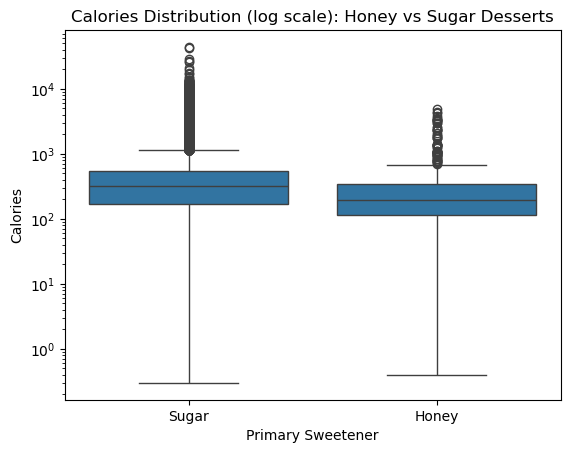

In [17]:
processed_df['primary_sweetener'] = processed_df.apply(lambda x: 'Honey' if x['only_honey'] else 'Sugar', axis=1)
sns.boxplot(x='primary_sweetener', y='calories', data=processed_df)
plt.yscale('log')
plt.title('Calories Distribution (log scale): Honey vs Sugar Desserts')
plt.xlabel('Primary Sweetener')
plt.ylabel('Calories')
plt.show()

Filtering outliers based on the interquartile range (IQR):

In [18]:
Q1 = processed_df['calories'].quantile(0.25)
Q3 = processed_df['calories'].quantile(0.75)
IQR = Q3 - Q1

lower_quartile = Q1 - 1.5 * IQR
upper_quartile = Q3 + 1.5 * IQR

processed_df = processed_df[(processed_df['calories'] >= lower_quartile) & (processed_df['calories'] <= upper_quartile)]
processed_df

,only_honey,only_sugar,calories,total_fat (%DV),sugar (%DV),sodium (%DV),protein (%DV),sat_fat (%DV),carbs (%DV),primary_sweetener
dessert_id,,,,,,,,,,
0,False,True,734.1,66.0,199.0,10.0,10.0,117.0,28.0,Sugar
2,False,True,174.4,13.0,67.0,5.0,4.0,26.0,7.0,Sugar
4,False,True,175.2,11.0,15.0,8.0,7.0,21.0,7.0,Sugar
5,False,True,387.6,39.0,98.0,12.0,12.0,67.0,11.0,Sugar
6,False,True,456.6,32.0,164.0,15.0,11.0,63.0,20.0,Sugar
...,...,...,...,...,...,...,...,...,...,...
34752,False,True,561.3,38.0,122.0,2.0,16.0,76.0,25.0,Sugar
34753,False,True,535.0,29.0,194.0,18.0,15.0,15.0,28.0,Sugar
34754,False,True,56.2,2.0,4.0,1.0,2.0,3.0,3.0,Sugar


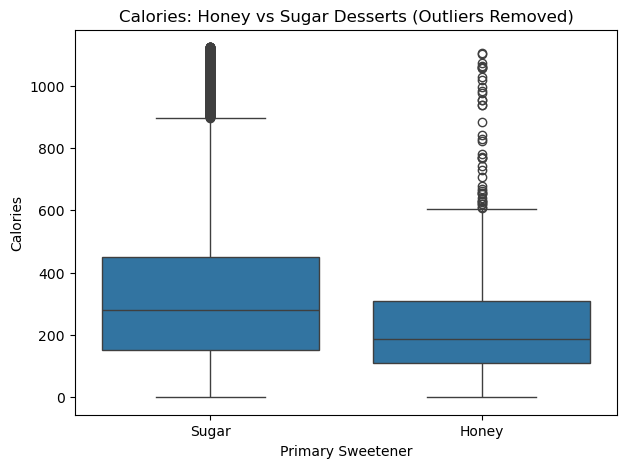

In [20]:
plt.figure(figsize=(7,5))
sns.boxplot(x='primary_sweetener', y='calories', data=processed_df)
plt.title('Calories: Honey vs Sugar Desserts (Outliers Removed)')
plt.xlabel('Primary Sweetener')
plt.ylabel('Calories')
plt.show()


This is the final processed data which we will be working with, which we can write to a CSV file:

In [21]:
processed_df.to_csv("data/02-processed/desserts.csv")

## Ethics 

### A. Data Collection
 - [ ] **A.1 Informed consent**: If there are human subjects, have they given informed consent, where subjects affirmatively opt-in and have a clear understanding of the data uses to which they consent?
 - [X] **A.2 Collection bias**: Have we considered sources of bias that could be introduced during data collection and survey design and taken steps to mitigate those?

    > The dataset reflects recipes uploaded by users on Food.com (formerly GeniusKitchen) and cleaned by researchers at UC San Diego. Although there is a vast range of dietary preferences stored as tags, we acknowledge that the data may skew towards certain cultures and demographics, inhibiting its ability to generalize to other use cases.

 - [X] **A.3 Limit PII exposure**: Have we considered ways to minimize exposure of personally identifiable information (PII) for example through anonymization or not collecting information that isn't relevant for analysis?

    > We will only use recipe-level data (ingredients, tags, nutrition). We will not analyze usernames, reviews, or any identifiable user metadata. The analysis focuses on aggregate nutritional properties rather than individuals. Although the data does include user IDs, we will be getting rid of these during the wrangling process.

 - [ ] **A.4 Downstream bias mitigation**: Have we considered ways to enable testing downstream results for biased outcomes (e.g., collecting data on protected group status like race or gender)?

### B. Data Storage
 - [X] **B.1 Data security**: Do we have a plan to protect and secure data (e.g., encryption at rest and in transit, access controls on internal users and third parties, access logs, and up-to-date software)?

    > The dataset is publicly available on Kaggle and does not contain sensitive personal data. It will be stored locally and we intend to maintain any change history on GitHub, specifically for coursework.

 - [ ] **B.2 Right to be forgotten**: Do we have a mechanism through which an individual can request their personal information be removed?
 - [X] **B.3 Data retention plan**: Is there a schedule or plan to delete the data after it is no longer needed?

    > The dataset is publicly accessible and local copies will likely be retained only for the duration of the course project. We might upload aggregated data but this will be clearly marked and identifiable as different from the raw data.

### C. Analysis
 - [X] **C.1 Missing perspectives**: Have we sought to address blindspots in the analysis through engagement with relevant stakeholders (e.g., checking assumptions and discussing implications with affected communities and subject matter experts)?

    > We intend to utilize a user's interpretation of features like 'healthy' and 'desserts' based on tags they assign to the uploaded recipe, which we acknowledged might be a biased perspective.

 - [X] **C.2 Dataset bias**: Have we examined the data for possible sources of bias and taken steps to mitigate or address these biases (e.g., stereotype perpetuation, confirmation bias, imbalanced classes, or omitted confounding variables)?

    > We will examine class balance (honey vs sugar desserts), ingredient labeling consistency (checking for membership instead of absolute comparison), and missing nutrition values. Filtering decisions (e.g., defining a “primary sweetener”) may introduce bias, which will be well-documented and reproducible in downstream analysis.

 - [X] **C.3 Honest representation**: Are our visualizations, summary statistics, and reports designed to honestly represent the underlying data?

    > All summary statistics and visualizations will be reported with clear note of assumptions, uncertainty, and limitations. The intention is to mimic our data in the way best intuitively understandable.

 - [X] **C.4 Privacy in analysis**: Have we ensured that data with PII are not used or displayed unless necessary for the analysis?

    > We will not analyze or display any user information which may be used to personally identify such individuals. We aim to keep all results at the recipe level.

 - [X] **C.5 Auditability**: Is the process of generating the analysis well documented and reproducible if we discover issues in the future?

    > As we are completing all relevant work through GitHub and the corresponding Jupyter Notebooks, we believe that results and discoveries should be easily accessible to those seeking to review what we have done later in the future. We value transparency, which we hope, will be visible through GitHub and their commit history. 

### D. Modeling
 - [ ] **D.1 Proxy discrimination**: Have we ensured that the model does not rely on variables or proxies for variables that are unfairly discriminatory?
 - [ ] **D.2 Fairness across groups**: Have we tested model results for fairness with respect to different affected groups (e.g., tested for disparate error rates)?
 - [X] **D.3 Metric selection**: Have we considered the effects of optimizing for our defined metrics and considered additional metrics?

    > Although we selected calories, sugar and fat as our operational definition for healthiness, we understand that there are many other factors that can be taken into account in regards to physical health and diet. 

 - [X] **D.4 Explainability**: Can we explain in understandable terms a decision the model made in cases where a justification is needed?

    > Our analytical methods will rely primarily on descriptive statistics, visualization, and classical statistical tests, which allow us to clearly explain differences in outcomes. We will also document our filtering decisions, statistical assumptions, and analysis steps to ensure transparency and interpretability. 

 - [X] **D.5 Communicate limitations**: Have we communicated the shortcomings, limitations, and biases of the model to relevant stakeholders in ways that can be generally understood?


    > When communicating our results, we aim to be clear that these statistics are based solely on the specific recipe which we have analyzed. Through such, we aim to avoid the perception that we are giving out advice regarding personal diets.

### E. Deployment
 - [ ] **E.1 Monitoring and evaluation**: Do we have a clear plan to monitor the model and its impacts after it is deployed (e.g., performance monitoring, regular audit of sample predictions, human review of high-stakes decisions, reviewing downstream impacts of errors or low-confidence decisions, testing for concept drift)?
 - [ ] **E.2 Redress**: Have we discussed with our organization a plan for response if users are harmed by the results (e.g., how does the data science team evaluate these cases and update analysis and models to prevent future harm)?
 - [ ] **E.3 Roll back**: Is there a way to turn off or roll back the model in production if necessary?
 - [X] **E.4 Unintended use**: Have we taken steps to identify and prevent unintended uses and abuse of the model and do we have a plan to monitor these once the model is deployed?

    > We would like to avoid instances in which our conclusions are interpreted as health recommendations. As such, we aim to portray our results from a statistical standpoint, rather than as a conclusion which should be served as a guideline for others. 



## Team Expectations 

* We will communicate virtually over discord; We expect replies within six hours, providing ample time for us to update our project based on the comments/ suggestions made by others. We expect to meet up prior to submissions, with standard check-ins being done through messages.  
* We decided that we would seek effective communication, not being afraid to be blunt when needed, as long as it is constructive and helpful towards our goals. We will still be mindful of being polite and respectful to the other members while doing so.
* Our teams decision making will be made largely based on majority vote, with considerations made based on the scale of the decision being made. We do not believe it to be necessary to notify others prior to making commits, as we have git history to rely back on, however, if conflicts between ideas arise based on these commits, they will be discussed in the group chat, decided by majority. In the event that a team mate is unresponsive, we will continue to move forward without them; we will stop to make adjustments upon their return as needed.
* We do not plan to assign leadership between members in regards to work, however, we will divide tasks, splitting up into smaller groups to complete work, or individually as we see fit. Tasks will be decided on preference, however, workload will be accounted for in the decision process. 
* See attatched below in the Project Timeline Proposal
* In the event that someone is struggling to keep up, we expect communication at prior to the day before a deadline. Upon this, remaining members will discuss how to redistribute the workload. In the event that this continues to happen, a meeting may be set up to discuss how to fix the issue.
* We can include this in the discord server as a pinned message, as well as on this GitHub repo.

## Project Timeline Proposal

| Week  | Deliverable | Work Expectations |
|---|---|---|
| Week 7  | Project Checkpoint 1  | Compile split-up work - Add feedback from proposal - Submit checkpoint |
| Week 8  | - | Conduct rudimentary EDA - Ideate insightful visualizations - Narrow scope of investigation |
| Week 9  | Project Checkpoint 2 | Finalize graphs and charts - Include statistical tests - Finalize EDA and inference |
| Week 10  | - | Record missing project components - Improve for cohesion - Consider research extensions |
| Finals Week  | Final Project | Add final touches - Incorporate feedback and suggestions - Turn in submission |